# Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

# Dataset Link-
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
# Read the dataset from the provided link
url = 'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [95]:
# Explore the first few rows of the dataset
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [96]:
# Get general information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [97]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [98]:
# Check the summary statistics of the dataset
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [99]:
# Count the number of unique values in each categorical column
print(df.nunique())

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [100]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [101]:
# Step 4: Data Preprocessing
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

In [106]:
# Step 5: Create a predictive model
X = df.drop("charges", axis=1)
y = df["charges"]

In [107]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
# Step 6: Predict and evaluate the model
y_pred = model.predict(X_test)

In [110]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [111]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 33596915.85136145
R-squared: 0.7835929767120724


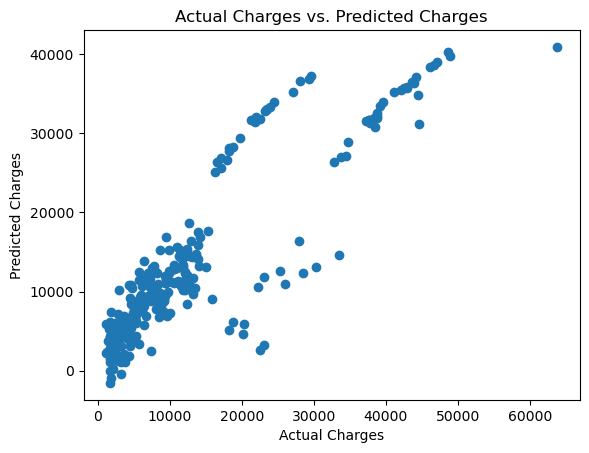

In [112]:
# Visualization
# Plot actual vs. predicted charges
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs. Predicted Charges")
plt.show()

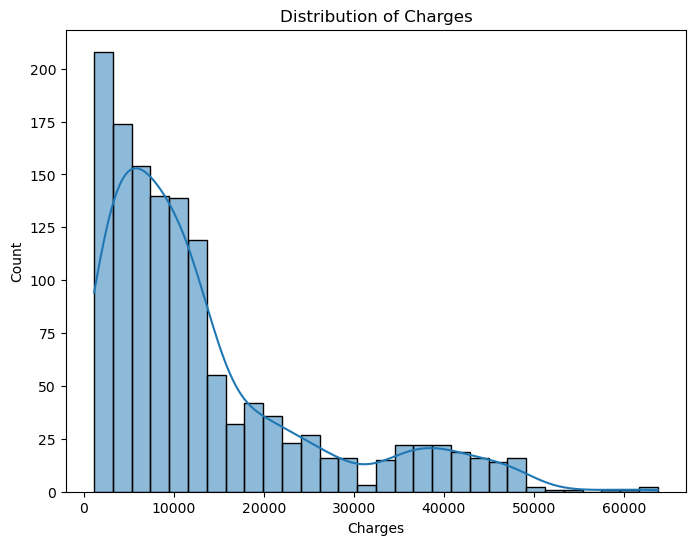

In [113]:
# Plot the distribution of charges
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="charges", kde=True)
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

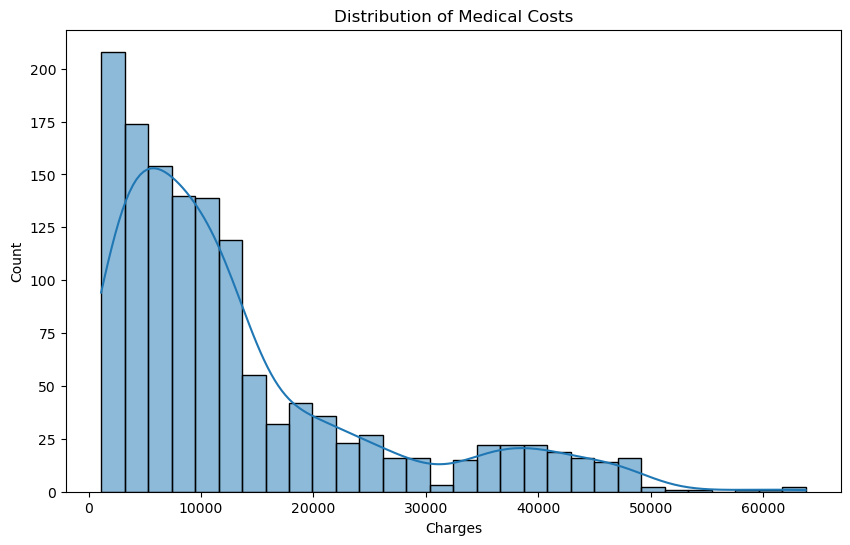

In [102]:
# Visualize the distribution of 'charges' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', kde=True)
plt.title('Distribution of Medical Costs')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

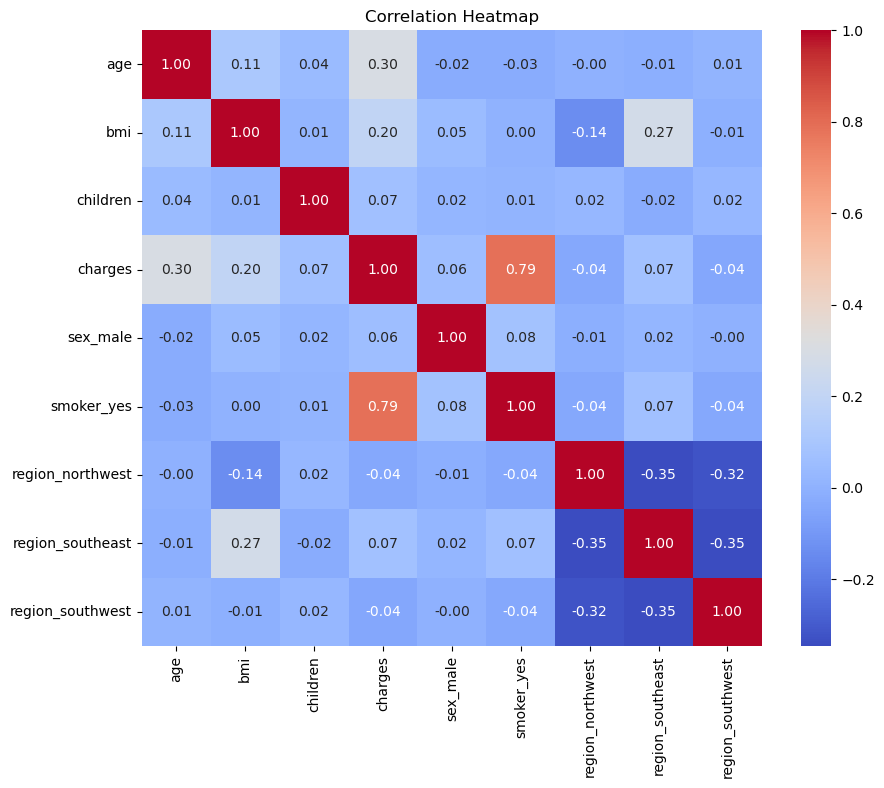

In [114]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

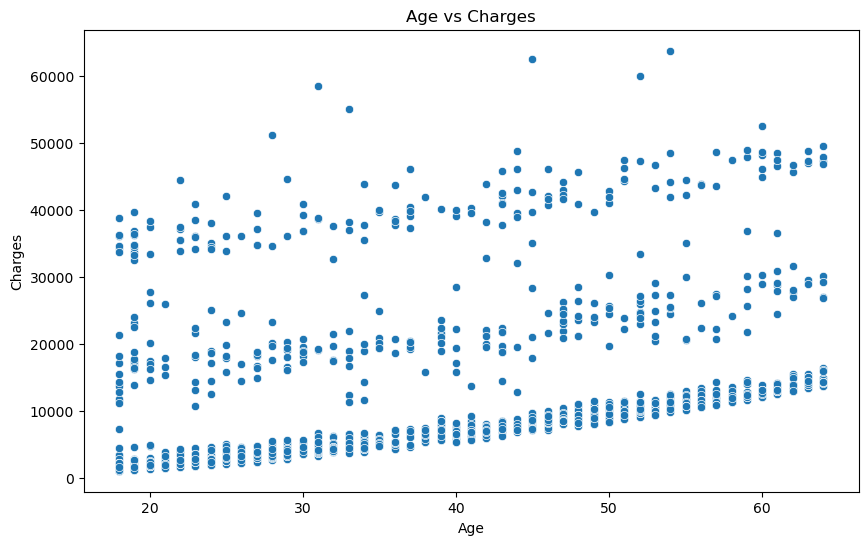

In [103]:
# Visualize the relationship between 'age' and 'charges' using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

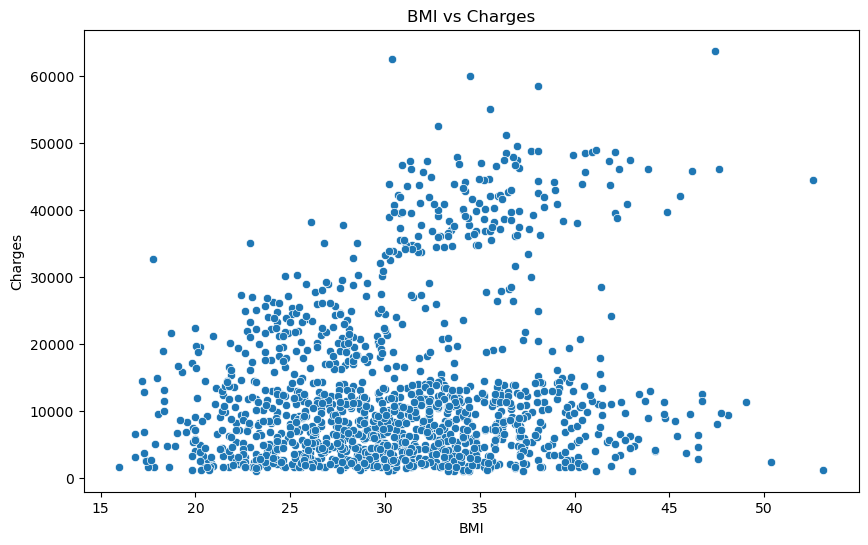

In [104]:
# Visualize the relationship between 'bmi' and 'charges' using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [115]:
df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


<Axes: >

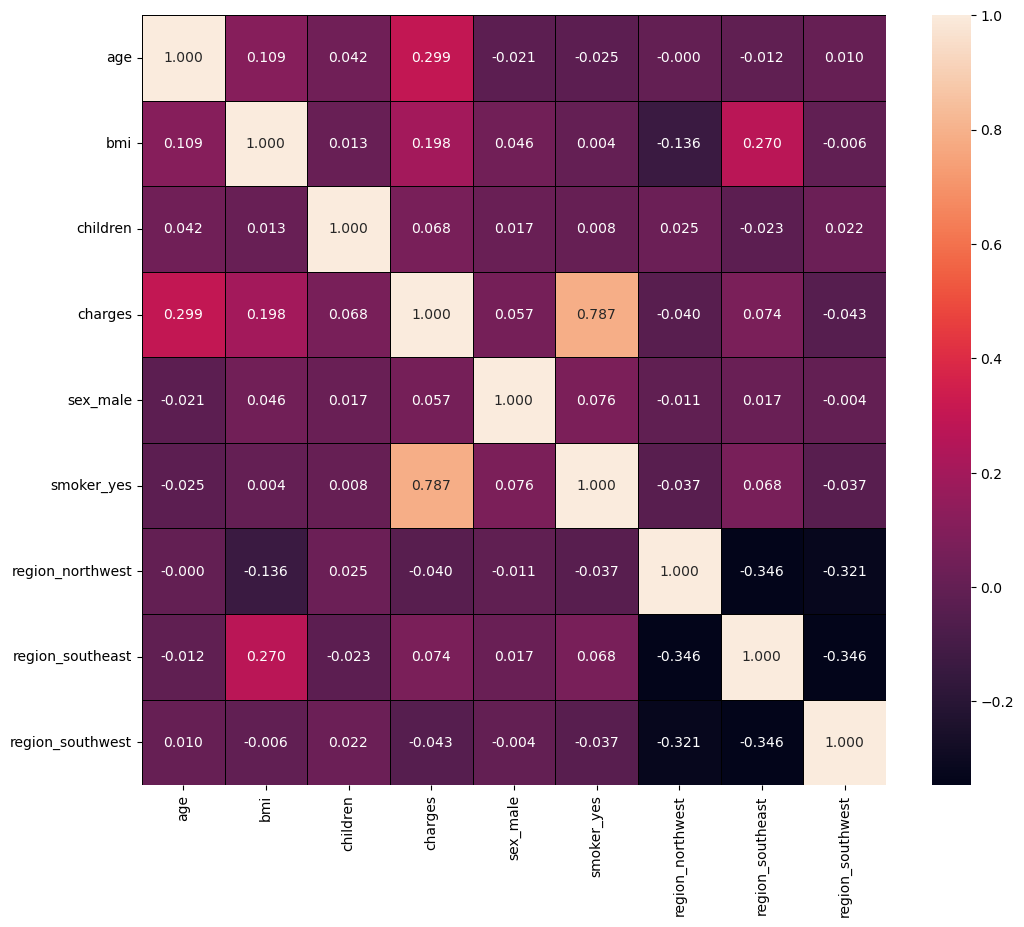

In [116]:
fig,ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), annot = True ,linewidth =.5 , linecolor ='black' , fmt= '.3f')

In [117]:
columns = df.iloc[:,:-1].columns
columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast'],
      dtype='object')

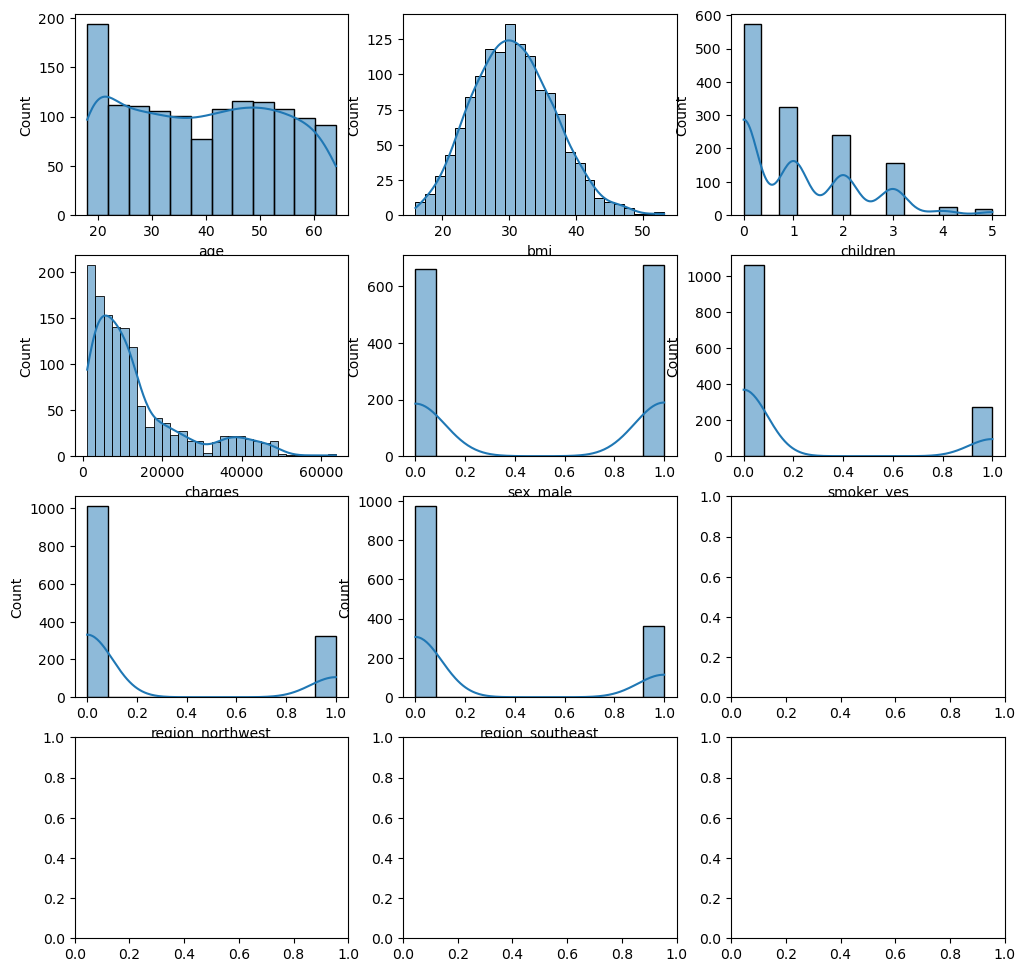

In [118]:
fig,ax = plt.subplots(4,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(df[i],kde=True,ax=ax[row,col])
    col += 1

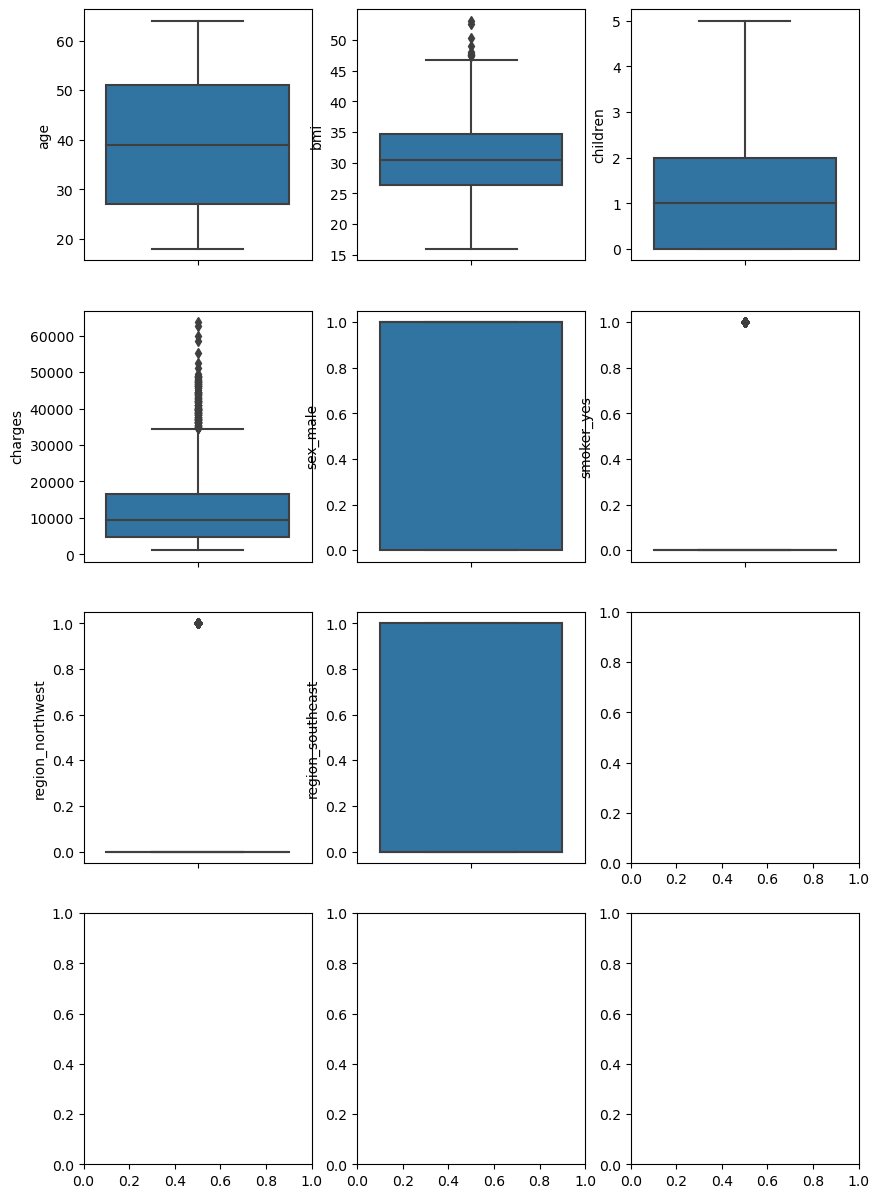

In [119]:
fig,ax = plt.subplots(4,3,figsize=(10,15))
row = col = 0
for n,i in enumerate(columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.boxplot(y=df[i],ax=ax[row,col])
    col += 1
plt.show()

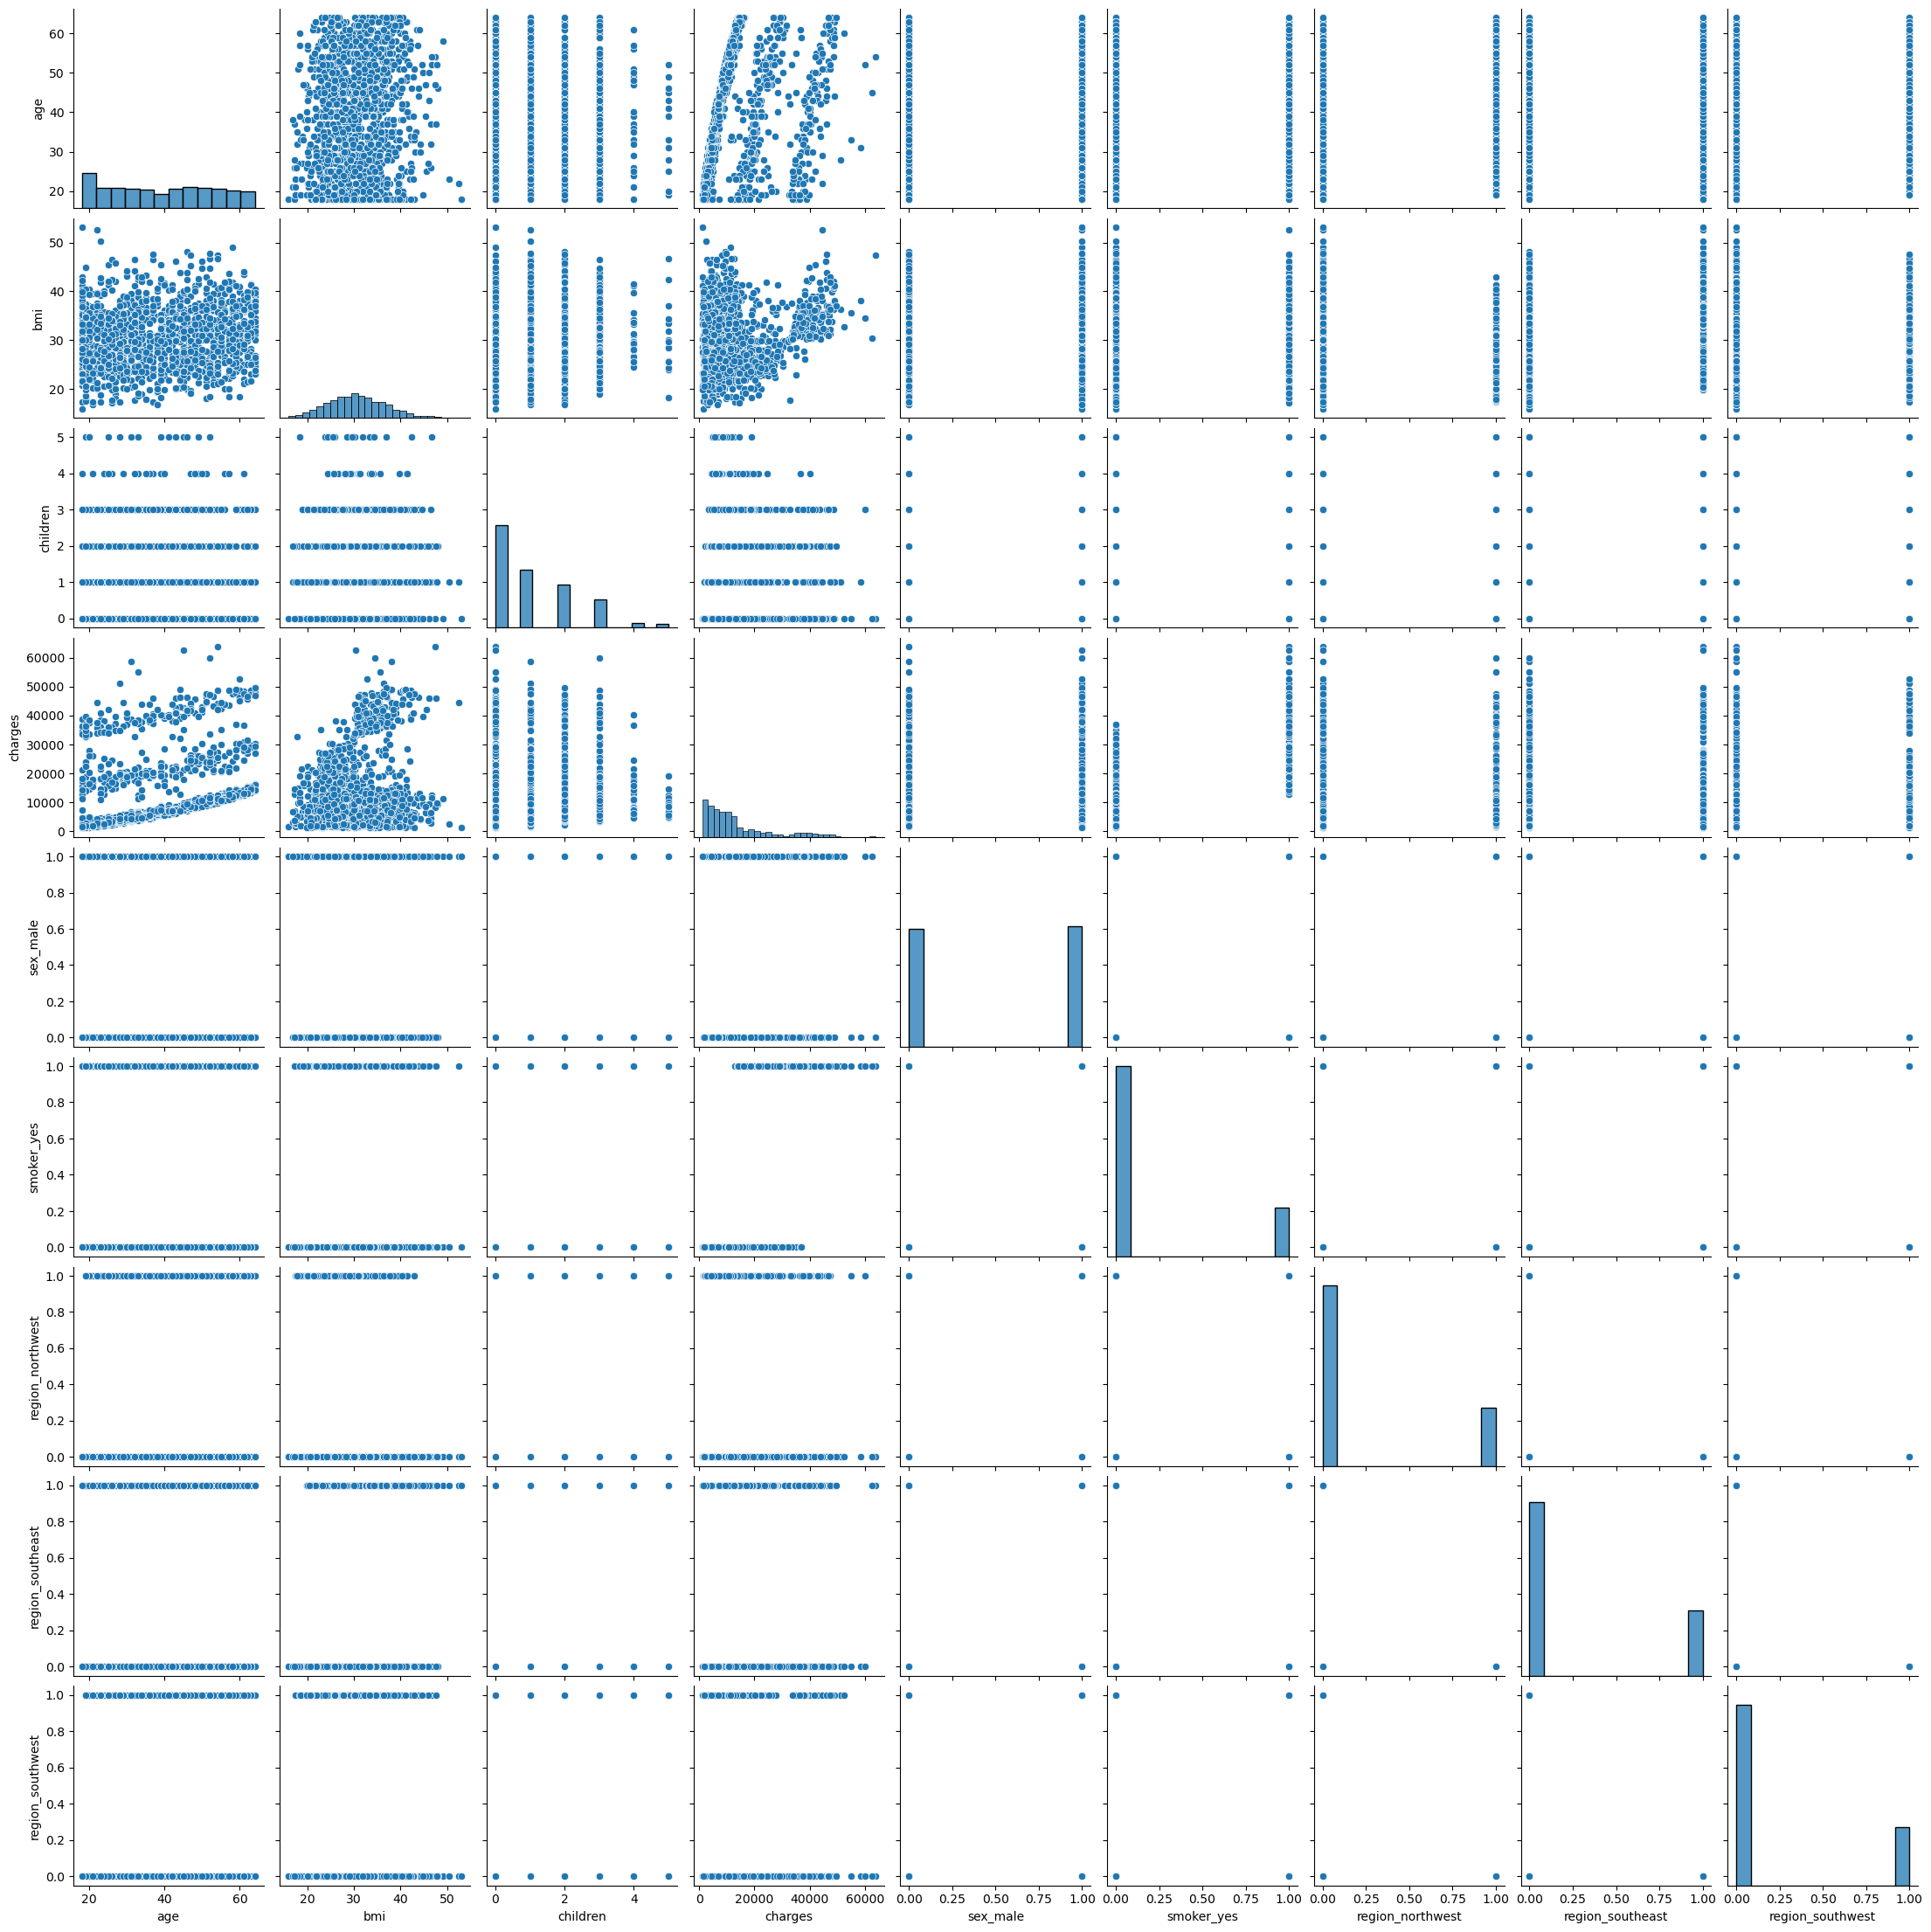

In [120]:
sns.pairplot(df)

In [121]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000
